<a href="https://colab.research.google.com/github/Colette-c/MAT-422/blob/main/HW_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

**Logistic regression** is a model that uses a logistic function to model a binary dependent variable. The **logistic function** is defined as $$log(\frac{p(\alpha ;x)}{1-p(\alpha ;x)})=\alpha^Tx$$ where $\alpha^Tx=\sum{x_i\alpha_i}$, $p$ is the probability, $x$ is the best parameters given the data $\alpha$.

Rearranging the expression gives $$p(\alpha ; x)=\sigma(\alpha^Tx)$$ where the **sigmoid function** is $$\sigma(t)=\frac{1}{1+e^{-t}}$$ for $t\in \mathbb{R}$

Text(0.5, 1.0, 'Sigmoid function')

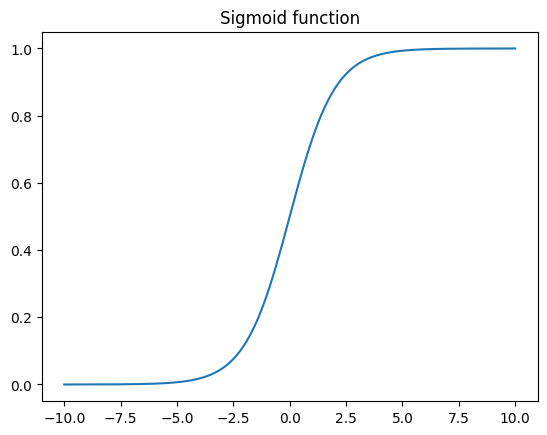

In [5]:
import numpy as np
import matplotlib.pyplot as plt

##Sigmoid function from the logistic function
def sigmoid(t):
  return 1 / (1+np.exp(-t))

x = np.linspace(-10,10,1000)
y = sigmoid(x)

plt.plot(x,y)
plt.title('Sigmoid function')

Computing the derivative of $\sigma$ we get:$$\sigma'(t)=\sigma(t)(1-\sigma(t))$$ and then computing the gradient with respect to $x$ we get: $$\nabla _x\sigma(\alpha^Tx)=\sigma(\alpha^Tx)(1-\sigma(\alpha^Tx))\alpha$$

The **cross-entropy loss** is: $$l(x;A,b)=-\frac{1}{n}\sum_{i=1}^{n}{b_i\log(\sigma(\alpha^Tx))}-\frac{1}{n}\sum_{i=1}^{n}{(1-b_i)\log(1-\sigma(\alpha^Tx))}$$
Then the **gradient of the cross-entropy loss** is: $$\nabla_xl(x;A,b)=-\frac{1}{n}\sum_{i=1}^{n}{(b_i-\sigma(\alpha_i^Tx))\alpha_i}$$

The Hessian matrix is:
$$\nabla_x^2l(x;A,b)=\frac{1}{n}\sum_{i=1}^{n}{\sigma(\alpha_i^Tx)(1-\sigma(\alpha_i^Tx))\alpha_i\alpha_i^T}$$

Then the iteration formula of the gradient descent algorithm is: $$x^{k+1}=x^k-\beta \ \nabla_xl(x^k;A,b)$$ where $\beta$ is the learning rate/step size

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Generate synthetic binary classification data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

## Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

## Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

## Make predictions on the test set
y_pred = model.predict(X_test)


Accuracy: 0.8666666666666667
Confusion Matrix:
 [[27  7]
 [ 1 25]]


<Axes: >

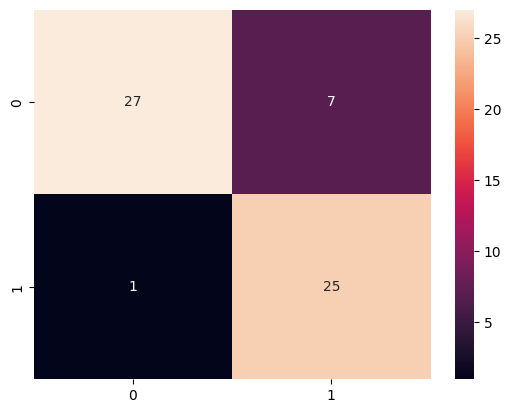

In [13]:
## Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
sns.heatmap(conf_matrix, annot=True)